<a href="https://colab.research.google.com/github/niz11/Bachelor_Thesis_Colab_Files/blob/main/Visualize_3_frames_composite_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load encoding
X = np.load('drive/My Drive/dataset_3_frame_seq_faces/X_3.npy')
y = np.load('drive/My Drive/dataset_3_frame_seq_faces/Y_label_3.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
import keras
from keras.layers import Input, Flatten, Dense,LSTM,TimeDistributed,RepeatVector
from keras.models import Model,Sequential
from keras.utils import plot_model


def create_model(encoding_length=64,sequence_length=10):
  # Define an input sequence and process it.
  encoder_inputs = Input(shape=(sequence_length, encoding_length))
  encoder = LSTM(encoding_length, return_sequences=True)(encoder_inputs)
  encoder_outputs, state_h, state_c  = LSTM(encoding_length, return_state=True, name='encoder')(encoder)
  encoder_states = [state_h, state_c]
  clssifier  = Dense(7, activation='softmax')(encoder_outputs)

  model = Model(inputs=encoder_inputs, outputs=[clssifier])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  plot_model(model, show_shapes=True, to_file='lstm_autoencoder.png')
  model.summary()
  return model

model = create_model(128, 3)
model.load_weights("drive/My Drive/trained_models/composite_paper_3/encoderComposite_3.h5",by_name=True)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 128)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 3, 128)            131584    
_________________________________________________________________
encoder (LSTM)               [(None, 128), (None, 128) 131584    
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 264,071
Trainable params: 264,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.05)

Epoch 1/10
80/80 [==============================] - 1s 17ms/step - loss: 1.4864 - accuracy: 0.4643 - val_loss: 1.0664 - val_accuracy: 0.7259
Epoch 2/10
80/80 [==============================] - 1s 7ms/step - loss: 0.7727 - accuracy: 0.7875 - val_loss: 0.6235 - val_accuracy: 0.8222
Epoch 3/10
80/80 [==============================] - 1s 7ms/step - loss: 0.3763 - accuracy: 0.9112 - val_loss: 0.4771 - val_accuracy: 0.8667
Epoch 4/10
80/80 [==============================] - 1s 7ms/step - loss: 0.1785 - accuracy: 0.9701 - val_loss: 0.4296 - val_accuracy: 0.8963
Epoch 5/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0894 - accuracy: 0.9839 - val_loss: 0.3634 - val_accuracy: 0.9259
Epoch 6/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0524 - accuracy: 0.9929 - val_loss: 0.4217 - val_accuracy: 0.9185
Epoch 7/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0276 - accuracy: 0.9965 - val_loss: 0.4121 - val_accuracy: 0.9259
Epoch 8/10
80/80 [=

In [ ]:
def getFaceExpressionFromIndex(i):
  if (i == 0):
      return 'surprise'
  elif (i == 1):
      return 'smile'
  elif (i == 2):
      return 'sad'
  elif (i == 3):
      return 'anger'
  elif (i == 4):
      return 'fear'
  elif (i == 5):
      return 'disgust'
  elif (i == 6):
      return 'none'
  else:
      print(i)

In [ ]:
test_predictions = model.predict(X_test)
correct = 0
for i in range(len(test_predictions)):
  truth = np.argmax(y_test[i])
  prediction = np.argmax(test_predictions[i])
  if truth == prediction:
    correct += 1
  else:
    print(f'Wrong classification, truth: {getFaceExpressionFromIndex(truth)}')
    print(f'Wrong classification, prediction: {getFaceExpressionFromIndex(prediction)}')
    print("---------------------------------------------------------------------------")
print(f'number of samples: {len(test_predictions)}')
print(f'correct: {correct}')
print(f'Accuracy of predicitons: {correct / len(test_predictions)}')

Wrong classification, truth: none
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: smile
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: smile
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: smile
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: sad
---------------------------------------------------------------------------
Wrong classification, truth: surprise
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: none
Wrong classification, prediction: anger
-------------------------

In [ ]:
# Here and below is the network to classify the encodings

In [ ]:
from keras.models import load_model
from keras.models import model_from_json
import json

# load json and create model
json_file = open('drive/My Drive/trained_models/composite_paper_3/encoderComposite_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
encoder = model_from_json(loaded_model_json)
# load weights into new model
encoder.load_weights("drive/My Drive/trained_models/composite_paper_3/encoderComposite_3.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# Check here: better divinding to test/train set
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load encoding
X = np.load('drive/My Drive/dataset_3_frame_seq_faces/X_3.npy')
y = np.load('drive/My Drive/dataset_3_frame_seq_faces/Y_label_3.npy')
predictions = encoder.predict(X)


X_train, X_test, y_train, y_test = train_test_split(predictions, y, test_size = 0.3, random_state = 0)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


def classifier():
  model = Sequential()
  model.add(Dense(64, input_dim=128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model = classifier()
model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
76/76 [==============================] - 0s 6ms/step - loss: 1.7561 - accuracy: 0.3147 - val_loss: 1.6302 - val_accuracy: 0.3829
Epoch 2/50
76/76 [==============================] - 0s 4ms/step - loss: 1.5076 - accuracy: 0.4577 - val_loss: 1.4252 - val_accuracy: 0.4684
Epoch 3/50
76/76 [==============================] - 0s 3ms/step - loss: 1.2978 - accuracy: 0.5352 - val_loss: 1.2386 - val_accuracy: 0.5651
Epoch 4/50
76/76 [==============================] - 0s 4ms/step - loss: 1.1078 - accuracy: 0.6161 - val_loss: 1.0870 - val_accuracy: 0.6468
Epoch 5/50
76/76 [==============================] - 0s 4ms/step - loss: 0.9406 - accuracy: 0.6961 - val_loss: 0.9423 - val_accuracy: 0.6803
Epoch 6/50
76/76 [==============================] - 0s 3ms/step - loss: 0.8019 - accuracy: 0.7570 - val_loss: 0.8423 - val_accuracy: 0.7063
Epoch 7/50
76/76 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.8047 - val_loss: 0.7763 - val_accuracy: 0.7472
Epoch 8/50
76/76 [==

In [ ]:
def getFaceExpressionFromIndex(i):
  if (i == 0):
      return 'surprise'
  elif (i == 1):
      return 'smile'
  elif (i == 2):
      return 'sad'
  elif (i == 3):
      return 'anger'
  elif (i == 4):
      return 'fear'
  elif (i == 5):
      return 'disgust'
  elif (i == 6):
      return 'none'
  else:
      print(i)

In [ ]:
test_predictions = model.predict(X_test)
correct = 0
for i in range(len(test_predictions)):
  truth = np.argmax(y_test[i])
  prediction = np.argmax(test_predictions[i])
  if truth == prediction:
    correct += 1
  else:
    print(f'Wrong classification, truth: {getFaceExpressionFromIndex(truth)}')
    print(f'Wrong classification, prediction: {getFaceExpressionFromIndex(prediction)}')
    print("---------------------------------------------------------------------------")

print(f'Accuracy of predicitons: {correct / len(test_predictions)}')
print(f'Got correct: {correct}')
print(f'Got wrong: {len(test_predictions) - correct}')

Wrong classification, truth: none
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: none
Wrong classification, prediction: sad
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: smile
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: smile
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: none
---------------------------------------------------------------------------
Wrong classification, truth: surprise
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: smile
Wrong classification, prediction: surprise
------------------------

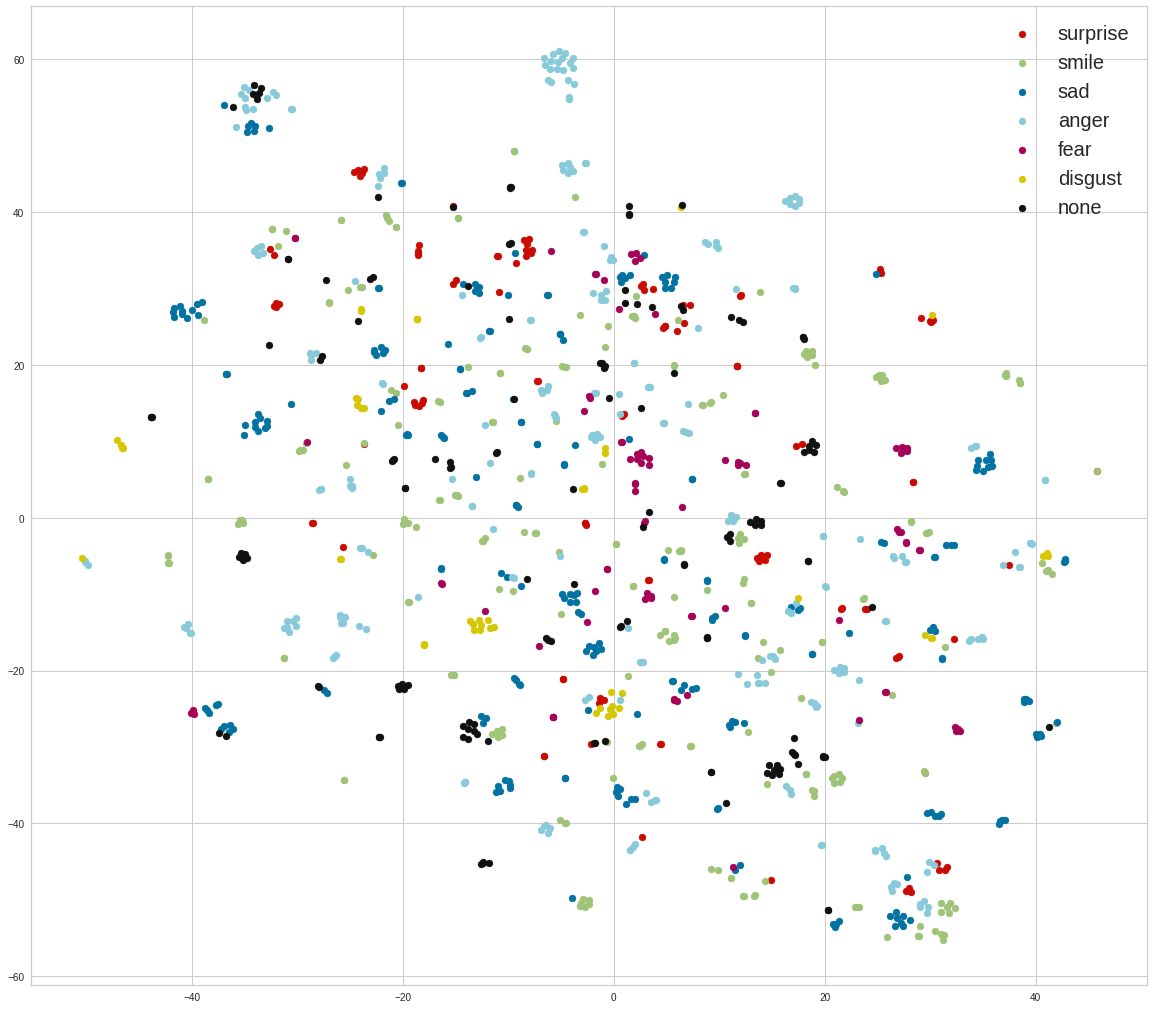

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X_test)
y_new = np.argmax(y_test,axis=1)

target_ids = range(0,7)

plt.figure(figsize=(20, 18))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
for i, c, label in zip(target_ids, colors, ["surprise", "smile","sad", "anger","fear", "disgust","none"]):
    plt.scatter(X_2d[y_new == i, 0], X_2d[y_new == i, 1], c=c, label=label)
plt.legend(prop={'size': 20})
plt.show()